#<b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

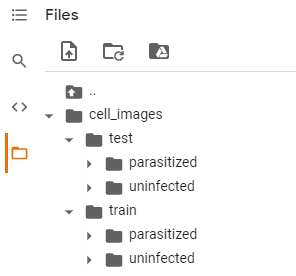

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [8]:
# shape of images
print ('train images shape is ', train_images.shape)
print ('test images shape is  ', test_images.shape)

train images shape is  (24958, 64, 64, 3)
test images shape is   (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [9]:
# shape of labels 
print ('train labels shape is ', train_labels.shape)
print ('test labels shape is  ', test_labels.shape)


train labels shape is  (24958,)
test labels shape is   (2600,)


#####<b> Observations and insights: 
- There are 24958 training images and 2600 test images with the same number of labels for each respectively. 
- Each image size is 64x64 pixels with 3 color components that could be RGB or HSV.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [10]:
# try to use min and max function from numpy

print (' Min and Max pixel value, train images: ' , np.amin(train_images), np.amax(train_images))
print (' Min and Max pixel value, test  images: ' , np.amin(test_images), np.amax(test_images))

 Min and Max pixel value, train images:  0 255
 Min and Max pixel value, test  images:  0 255


#####<b> Observations and insights: 
- Both sets if unages have full range of pixel values from 0 to 255 for at least some color component. 



###<b> Count the number of values in both uninfected and parasitized 

In [12]:
# using np.unique to count labels of 1 and 0 
# first the train set
(unique, Train_counts) = np.unique(train_labels, return_counts=True)
Train_frequencies = np.asarray((unique, Train_counts)).T
print ('for lables 0 and 1 in the training set we have:')
print(Train_frequencies)

# Then the test set
(unique, Test_counts) = np.unique(test_labels, return_counts=True)
Test_frequencies = np.asarray((unique, Test_counts)).T
print ('And for lables 0 and 1 in the test set we have:')
print(Test_frequencies)



for lables 0 and 1 in the training set we have:
[[    0 12479]
 [    1 12479]]
And for lables 0 and 1 in the test set we have:
[[   0 1300]
 [   1 1300]]


###<b>Normalize the images

In [13]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images).astype('float32')/255
test_images = (test_images).astype('float32')/255

#####<b> Observations and insights: 
- Both training and test image datasets are evenly split between uninfected and parasitized.

###<b> Plot to check if the data is balanced

Training Data Split


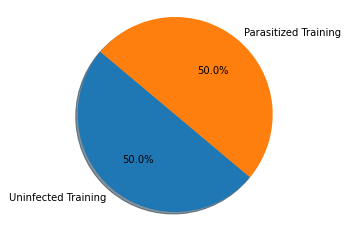

[12479, 12479]

******************************

Test Data Split


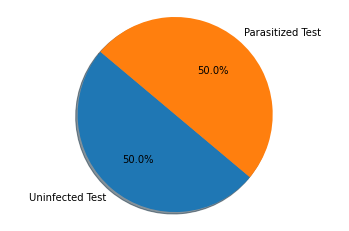

[1300, 1300]


In [50]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
#Pl_lables = [Train_frequencies[0,0], Train_frequencies[1,0]]
print('Training Data Split')
Pl_lables_train = ['Uninfected Training', 'Parasitized Training']
Pl_values_train = [Train_frequencies[0,1], Train_frequencies[1,1]]
fig1, ax1 = plt.subplots()
ax1.pie(Pl_values, labels=Pl_lables_train, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(Pl_values_train)

#now for test data
print()
print ("*"*30)
print()
print('Test Data Split')
Pl_lables_test = ['Uninfected Test', 'Parasitized Test']
Pl_values_test = [Test_frequencies[0,1], Test_frequencies[1,1]]
fig1, ax1 = plt.subplots()
ax1.pie(Pl_values_test, labels=Pl_lables_test, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(Pl_values_test)


#####<b> Observations and insights: 
- As expected the train set is evenly split between uninfected and parasitized data sets.

### <b>Data Exploration</b>
Let's visualize the images from the train data

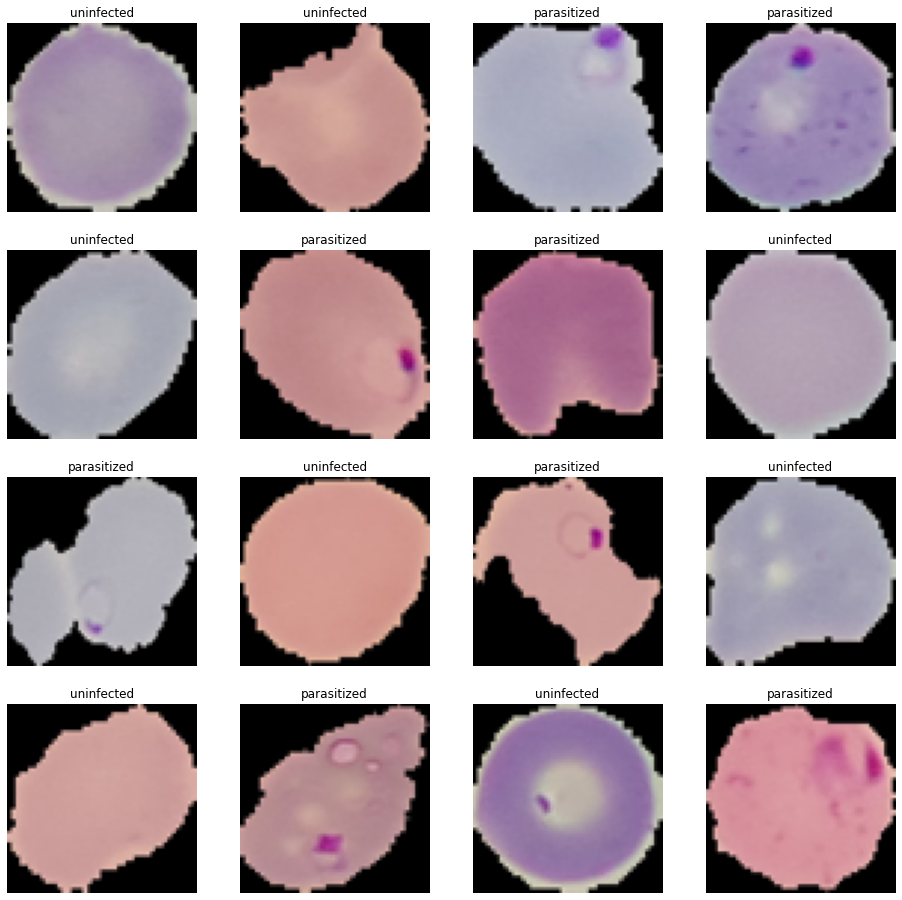

In [23]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights: 
- Cells seem to have a variety of shapes but more or less round or near round.
- Uninfected cells seem to have a uniform pixel value distribution up to their boundry.
- Parasitized cells seem to have additional features inside thier cell boundaries, mostl consisting of large pixel value variations in a small area the size of a handful of pixes.
- Luminance or chrominance variation inside the boundaries might be a good handle on deciding whether or not a cell is parasitized.
- One exception to this rule is the penaltimate image with lighter interior portion, encompaced by purple outer section. There does seem to be a feature very similar to the parasitized cells in the lighter interior portion.

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

Going for three rows, hence 18 figures.

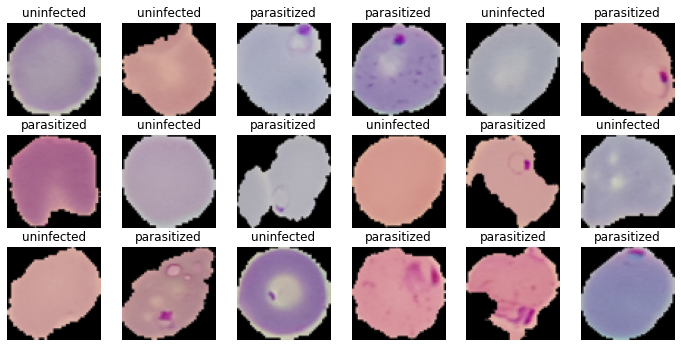

In [24]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 19): # doing three rows of images this time
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')




#####<b>Observations and insights:
- Resizing images, in gereral, results in some loss in image resolution due to averaging or pixel extrapolation operations.
- In this particular case, the presense of parasites might be harder to detect due to the fact that parasitic feature shrinks and gets closer to the boundary in some cases. 
- Another worry is that the resizing may make the parasitic feature less pronounced.

###<b> Plotting the mean images for parasitized and uninfected

In [25]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

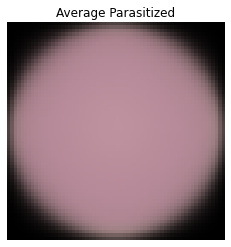

In [26]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

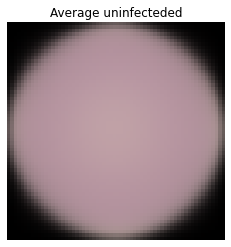

In [27]:
# Similarly write the code to find the mean image of uninfected
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
uninfecteded_data=[]                                # Create a list to store the uninfected data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfecteded_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfecteded_data), 'uninfecteded')   # find the mean



#####<b> Observations and insights: 
- The parasitized image data sets seems darker and the edges seem more blurry compared with the uninfected dataset. 
- The relative darkness of the parasitized dataset might be due to having more dark features in random spots throughout the cell. 
- The more blurry nature of the image might indicate that the shape of the parasitized cells may have been more disturbed, which on average, makes for less sharp edges.

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [28]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


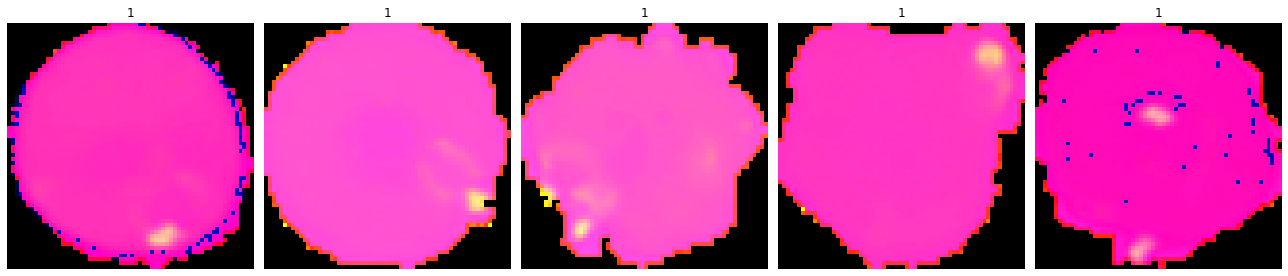

In [29]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

In [30]:
# Similarly you can visualize for the images in the test data
gfx_test=[]   # to hold the HSV image array for test image data set
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx_test.append(a)
gfx_test=np.array(gfx_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


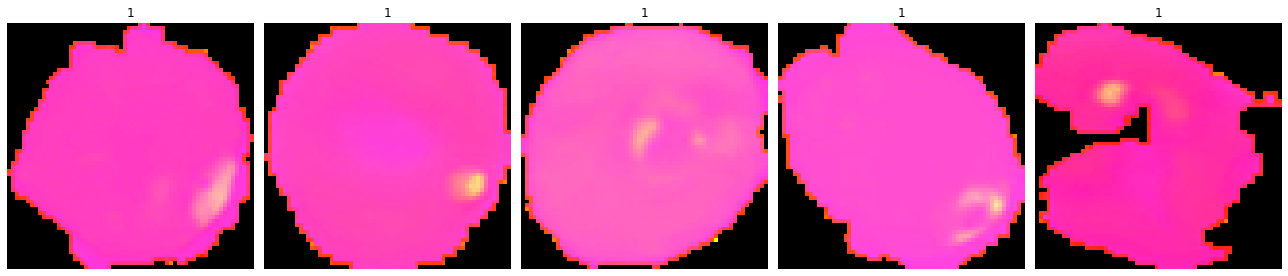

In [31]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: 
- For both test and train image data sets, the transformation from RGB to HSV seems to enhance the features in parasitized data. The contrast is enhanced and it might be easier to find these features by training a CNN model accordingly. 

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [32]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

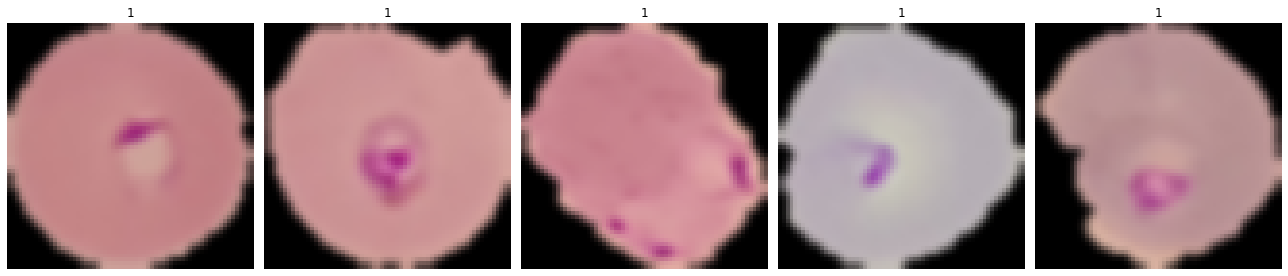

In [33]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

In [34]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx_test=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx_test.append(b)
gbx_test=np.array(gbx_test)

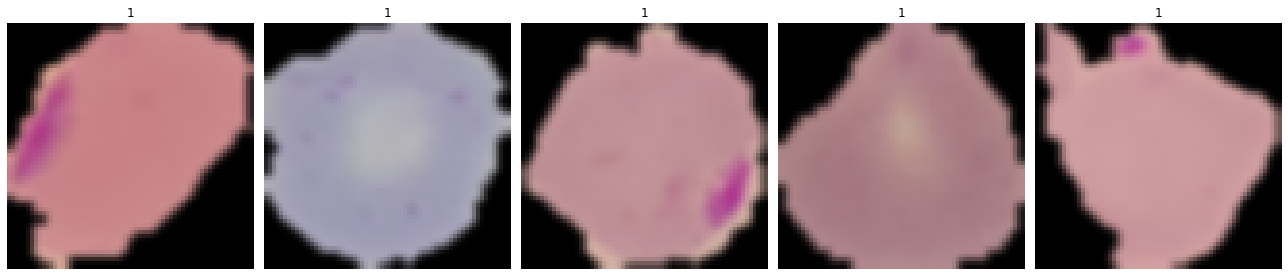

In [35]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: 
- For both training and test image data sets the parasitized cells seem to have been blurred as a result of Gaussian smoothing. This is what Gaussian filters do.
- This appears to have evened-out parasitic features in the cell and there is less contast between the healthy part and the parasitic part of the cell.
- Such smoothing, seems to hamper the training of a CNN 
- As a result this appears not to help
- An endge enhancing or edge detection filter (or both) might be a better option to emphasize the parasitic features in the parasitized cells. **

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>

- From the images, it appears that most every parasitized-labeled image has some internal feature. 
- The uninfected cells seem to be all free of internal features, with one exception, which seems to be different in nature.
- The internal features appear as variation in color and intensity, and seem to be enhanced with HSV representation.
- This could suggest starting with filtering edge detection to find internal features.
- A CNN model, with two filter layes, and 2-3 flat NN layers should be a good way to look into this.
- To ensure the feature is intenal, there should be two-edges in any given direction, otherwise the edge may be external to the cell. We need to ensure that the model learns this.
- The leyer depth of the model and number of nodes in each layer could be explored further.
- Since this is a binary classification mosel, an ACCURACY vs. RECALL test should be the best handle on the model success.
- RECALL is class 1 should be taken of more importance, since we don't want to miss infected cases.